<img src="https://www.dropbox.com/s/l93ecugg1jbtjiw/fga.png?raw=1" width="1200" height="400">
<ul>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Primeira (1/3) Atividade Prática Avaliativa
    Entrega da Atividade 27/07/2022 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"


<div id="Tópicos">
    <h2>Questões</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol> 
<li> Colete os preços e volumes de um conjunto de ativos durante o período de 10 (quinze) anos, pertencentes a no mínimo 5 (cinco) Índices de Segmentos e Setoriais diferentes na B3, e separe os 30 (cinquenta) ativos mais líquidos; </li><p></p>
    <li> Construa amostras de treinamento e outras de teste, sendo a primeira com os 3 (três) anos e a segunda com o último ano, e desloque as janelas anualmente (walk forward analysis); </li> <p></p>
    <li> Na amostra de treinamento, aplique uma clusterização não supervisionada (K-Means ou DBSCAN) e separe um ativo para cada clusters, com o critério que desejar (sugestão maior índice Sharpe); </li><p></p>
    <li> Aplique a Teoria do Portfolio Moderno de Markowitz nos ativos escolhidos no passo anterior, no sentido de alocar um capital de R$100.000,00; </li><p></p>
    <li> Verifique o resultado da alocação de capital com Markowitz nos ativos separados, na fase de treinamento, na amostra de teste que representa o último ano da aquisição e compare com o índice Bovespa; </li><p></p>
    <li> Descreva suas impressores relativas ao processo, baseado em números, e resultados encontrados. </li>
</ol>
</div>


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import investpy
import matplotlib.dates as mdates
from scipy import signal
import yfinance as yf
from tqdm.notebook import tqdm
import datetime as dt
plt.style.use('dark_background')
import ssl
import random


## Escolha dos Ativos

Para a seleção dos ativos, optamos por fazer pesquisas online para que dessa forma pudessemos coletar os ativos mais liquídados dos últimos anos. Com estas pesquisas, chegamos em uma lista de 35 ativos, que pode ser visualizada abaixo.

In [3]:


symbols = list([])

with open('financial_assets.txt', 'r', encoding='utf-8') as file:
    for line in file.readlines():
        symbols.append(line.rstrip('\n') + '.SA')

df = pd.DataFrame(symbols, columns=['ATIVOS'])

np.array(symbols)


array(['MGLU3.SA', 'VIIA3.SA', 'OIBR3.SA', 'B3SA3.SA', 'HAPV3.SA',
       'CIEL3.SA', 'COGN3.SA', 'CASH3.SA', 'VALE3.SA', 'ELET3.SA',
       'PRIO3.SA', 'ABEV3.SA', 'CSNA3.SA', 'PETR3.SA', 'CVCB3.SA',
       'LREN3.SA', 'AMER3.SA', 'LWSA3.SA', 'EMBR3.SA', 'VVBBR3.SA',
       'IRBR3.SA', 'BBAS3.SA', 'BRML3.SA', 'ENEV3.SA', 'NTCO3.SA',
       'DMMO3.SA', 'WEGW3.SA', 'TEND3.SA', 'GGMAT3.SA', 'GFSA3.SA',
       'BRFS3.SA', 'JBSS3.SA', 'CCRO3.SA', 'RAIL3.SA', 'CMIN3.SA'],
      dtype='<U9')

## Importação de dados históricos

A partir disso, coletamos os dados históricos dos últimos 10 anos destes ativos, porém alguns tiveram erros de importação destes dados. Assim, reduzindo nosso escopo para 23 ativos

In [4]:
def historicalDay(coin,yesterdayB,todayB):
    df = yf.download(coin, start=str(yesterdayB), end=str(todayB)) 
    df=df[df.columns[:4]]
    return df

todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=10*365)
print(todayB,yesterdayB)

outClose= pd.DataFrame()
cols=[]

for symbol in tqdm(symbols):
    try: 
        df=historicalDay(symbol,yesterdayB,todayB)

        dfOutClose = df['Close']
    
        
        outClose = pd.concat([outClose,dfOutClose],axis=1)

        
        cols.append(symbol)
    except:
        print("Erro",symbol)
        
outClose.columns=cols
output=outClose.copy()

2022-08-01 2012-08-03


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

<AxesSubplot:>

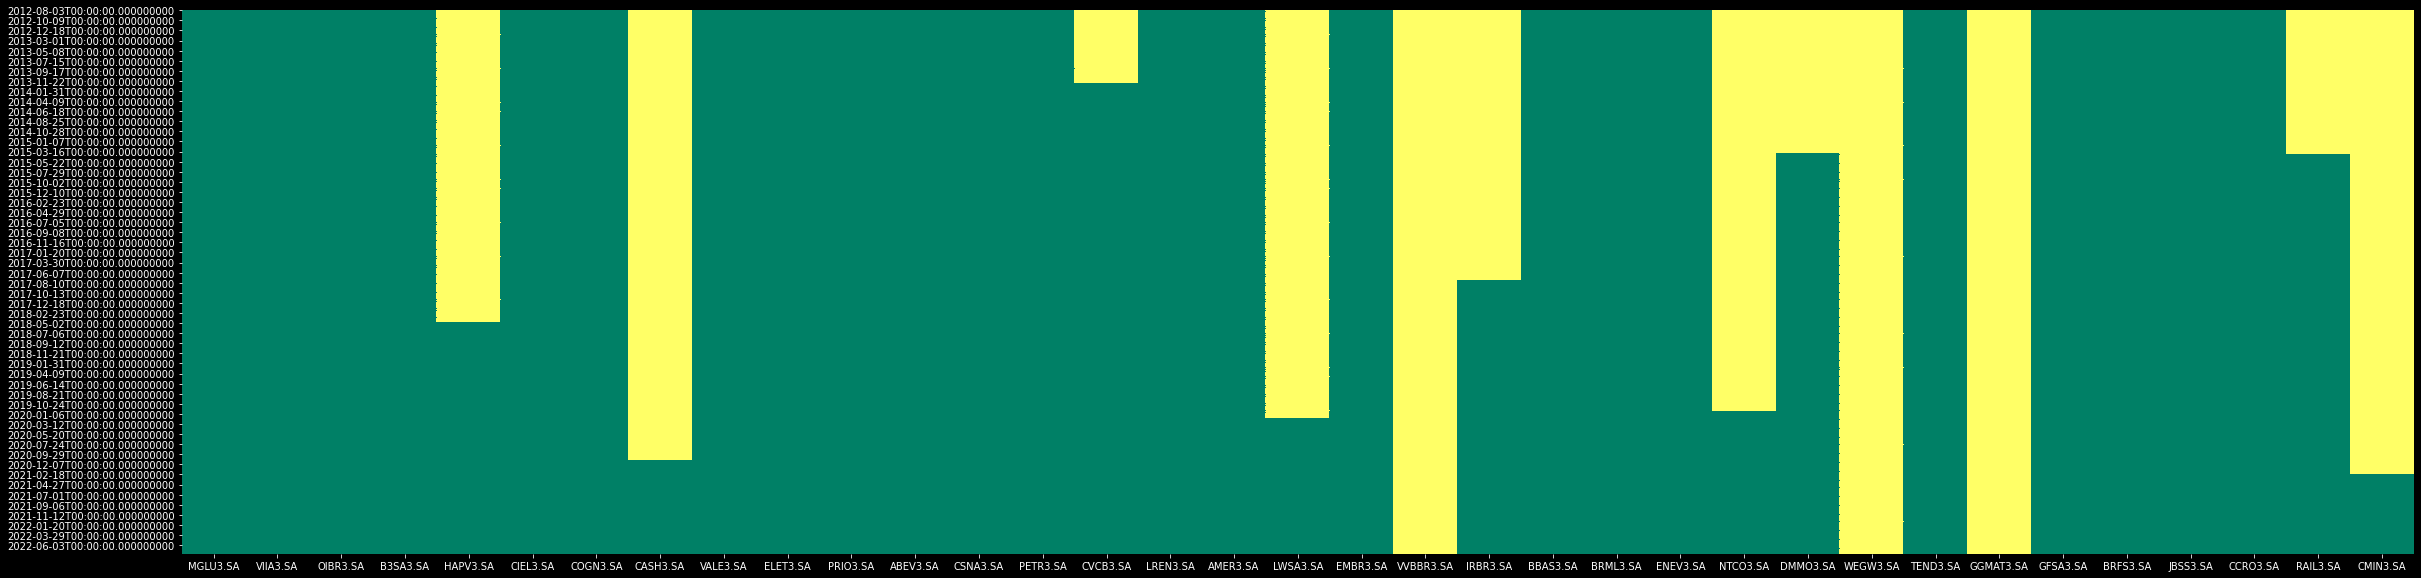

In [5]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

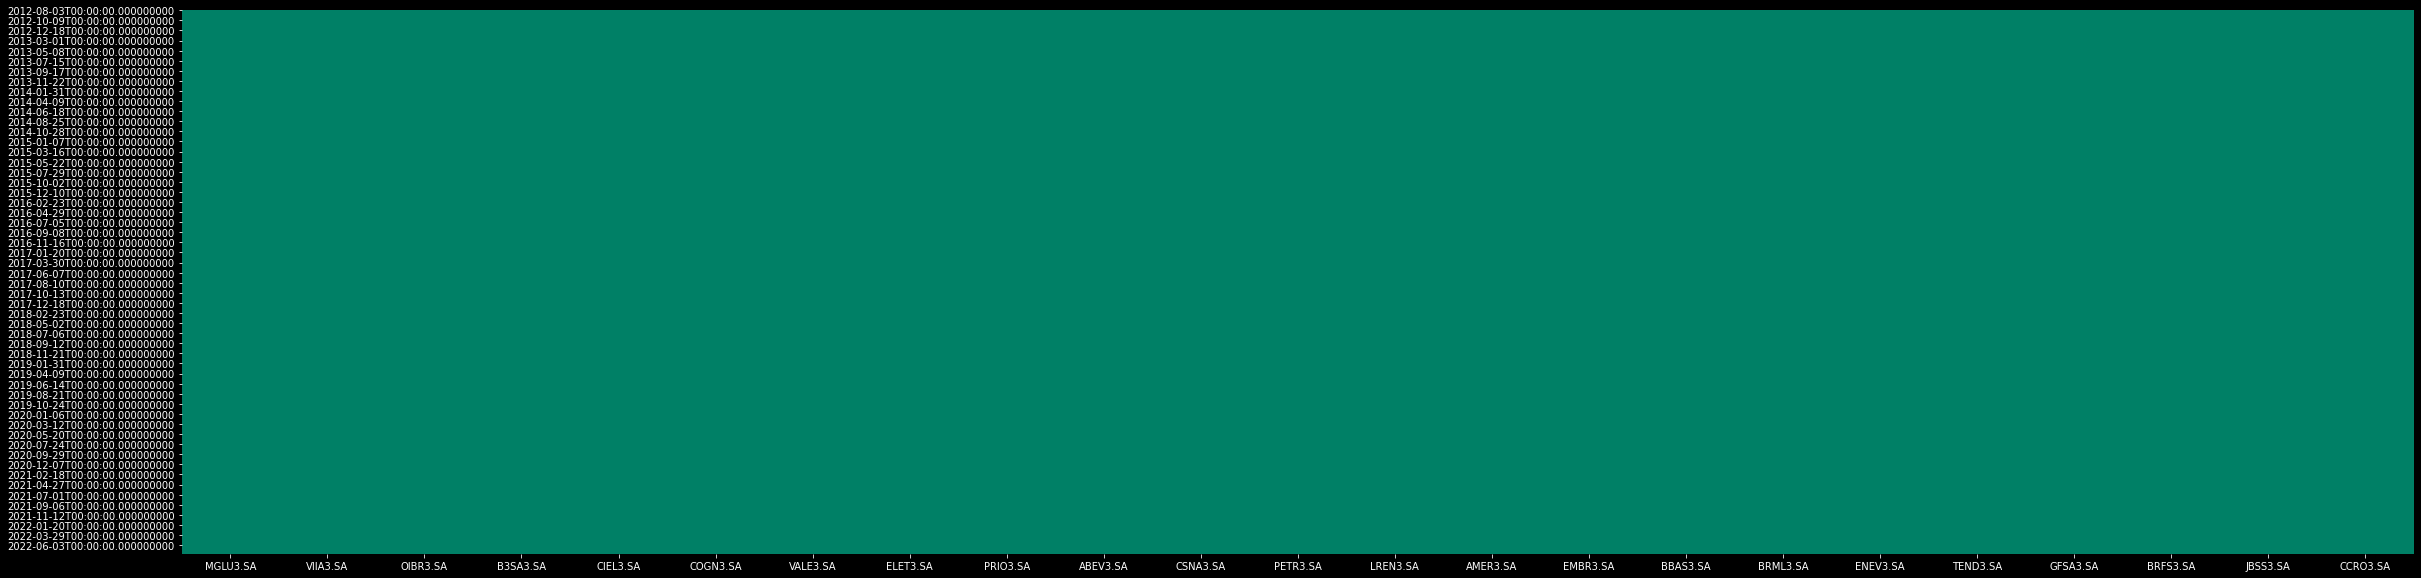

In [6]:
cols=output.columns[output.isnull().sum().values<3]
plt.figure(figsize=(40,10))
sns.heatmap(output[cols].dropna().isnull(),  cbar=False, cmap = 'summer')
output=output[cols].dropna()

Abaixo podemos ver o resultado da importação destes dados

In [7]:
output

,MGLU3.SA,VIIA3.SA,OIBR3.SA,B3SA3.SA,CIEL3.SA,COGN3.SA,VALE3.SA,ELET3.SA,PRIO3.SA,ABEV3.SA,...,AMER3.SA,EMBR3.SA,BBAS3.SA,BRML3.SA,ENEV3.SA,TEND3.SA,GFSA3.SA,BRFS3.SA,JBSS3.SA,CCRO3.SA
2012-08-03,0.332500,4.55,81.345833,3.986666,14.894386,1.750001,37.299999,14.444511,4.800000,12.664708,...,6.602754,12.24,23.120001,16.755852,157.150131,4.97,20.661917,29.330000,5.560000,18.150000
2012-08-06,0.348437,4.55,81.718979,4.000000,14.807581,1.750001,37.700001,14.654431,5.140000,12.858688,...,6.843991,12.24,23.830000,16.715719,156.639450,4.97,21.522829,29.770000,5.590000,18.290001
2012-08-07,0.338437,4.55,80.375656,3.930000,14.658082,1.750001,37.639999,14.654431,5.140000,12.704704,...,6.379386,12.24,23.549999,16.494984,156.453751,4.97,21.522829,29.750000,5.590000,17.840000
2012-08-08,0.338437,4.55,82.017494,3.926666,14.995659,1.750001,37.930000,14.654431,5.140000,12.698704,...,6.647427,12.24,23.879999,16.421404,160.353485,4.97,21.522829,30.400000,5.590000,18.150000
2012-08-09,0.336875,4.75,81.196571,3.950000,14.935378,1.750001,38.299999,15.244207,4.880000,12.654709,...,6.558080,13.10,23.389999,16.454849,157.753662,4.97,22.276129,29.530001,5.680000,18.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,2.790000,2.52,0.500000,10.730000,4.100000,2.220000,70.489998,44.849998,23.610001,14.680000,...,15.570000,11.79,35.200001,7.810000,14.490000,4.18,1.170000,16.299999,31.620001,12.360000
2022-07-26,2.610000,2.36,0.490000,10.730000,4.140000,2.140000,70.360001,44.650002,23.740000,14.820000,...,14.810000,11.60,35.320000,7.750000,14.410000,3.99,1.110000,16.290001,32.560001,12.440000
2022-07-27,2.700000,2.48,0.490000,10.880000,4.300000,2.250000,70.519997,45.369999,23.690001,14.980000,...,15.460000,11.93,35.549999,7.970000,14.900000,4.01,1.170000,16.360001,33.180000,12.630000
2022-07-28,2.720000,2.51,0.480000,11.260000,4.280000,2.260000,70.690002,45.450001,23.790001,15.100000,...,15.090000,11.80,36.209999,8.050000,15.260000,4.04,1.230000,16.350000,32.080002,13.010000


In [8]:
anos=sorted(list(set(output.index.year)))
treino=[[a,a+1,a+2] for a in anos[:-3]]
teste=anos[3:]

for tr,te in zip(treino[:7],teste[:7]):
    
    tr_aux=output[ (output.index.year==tr[0]) | 
                   (output.index.year==tr[1]) | 
                   (output.index.year==tr[2])]
    
    te_aux=output[(output.index.year==te)]
    
    print(sorted(list(set(tr_aux.index.year))),list(set(te_aux.index.year)))

[2012, 2013, 2014] [2015]
[2013, 2014, 2015] [2016]
[2014, 2015, 2016] [2017]
[2015, 2016, 2017] [2018]
[2016, 2017, 2018] [2019]
[2017, 2018, 2019] [2020]
[2018, 2019, 2020] [2021]


## Escoha dos Ativos (K-Means)

Com o objetivo de separar os melhores ativos, aplicamos um técnica de clusterização K-Means

Ativos com Melhor Relação em Cada Cluster: ['JBSS3.SA', 'MGLU3.SA', 'PRIO3.SA']


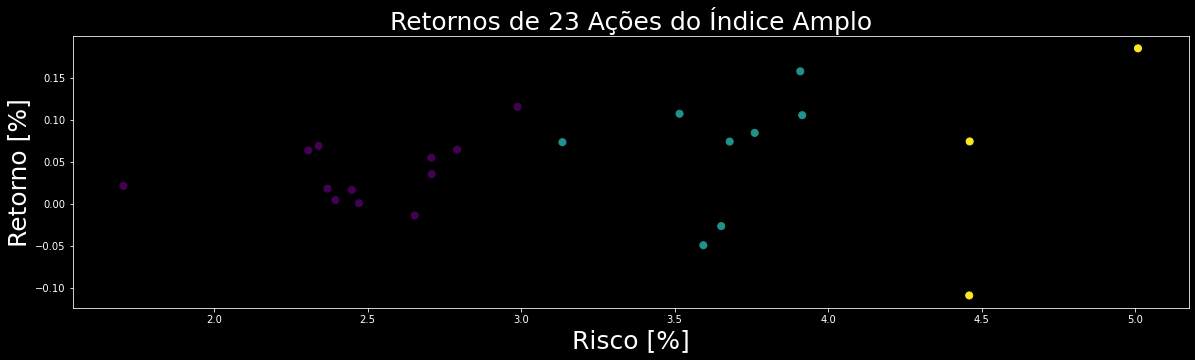

In [9]:
from sklearn.cluster import KMeans

retornos=100*output.pct_change()
stocks=retornos.columns

X=np.array([[np.std(retornos[st]),np.mean(retornos[st])] for st in stocks])

N=3

kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.set_title('Retornos de '+str(len(stocks))+' Ações do Índice Amplo',fontsize=25)
ax1.set_xlabel('Risco [%]',fontsize=25)
ax1.set_ylabel('Retorno [%]',fontsize=25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2);

best=[]
for i in range(N):
    ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()/retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
    best.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(best).columns)
print("Ativos com Melhor Relação em Cada Cluster:", rb)

In [10]:
retornos.mean().sort_values().tail()

AMER3.SA    0.105267
ELET3.SA    0.106978
JBSS3.SA    0.115204
MGLU3.SA    0.157487
PRIO3.SA    0.184808
dtype: float64

In [11]:
retornos.std().sort_values().tail()

MGLU3.SA    3.910021
AMER3.SA    3.916361
OIBR3.SA    4.460420
VIIA3.SA    4.461902
PRIO3.SA    5.010090
dtype: float64

Ativos com Melhor Relação em Cada Cluster: ['JBSS3.SA', 'PRIO3.SA', 'MGLU3.SA']


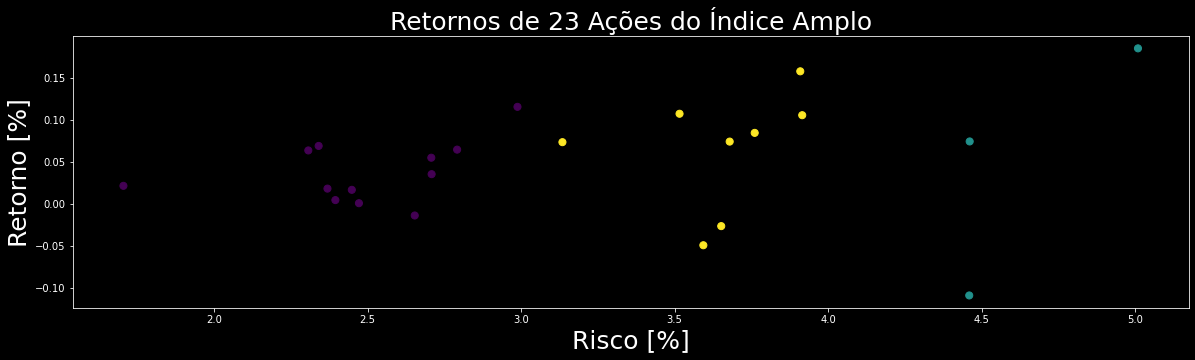

In [12]:
retornos=100*output[list(set(stocks)-set(['TCSA3','HBOR3']))].pct_change()
stocks=retornos.columns

X=np.array([[np.std(retornos[sto]),np.mean(retornos[sto])] for sto in stocks])

N=3

kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.set_title('Retornos de '+str(len(stocks))+' Ações do Índice Amplo',fontsize=25)
ax1.set_xlabel('Risco [%]',fontsize=25)
ax1.set_ylabel('Retorno [%]',fontsize=25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2);

best=[]
for i in range(N):
    ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()/retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
    best.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(best).columns)
print("Ativos com Melhor Relação em Cada Cluster:", rb)

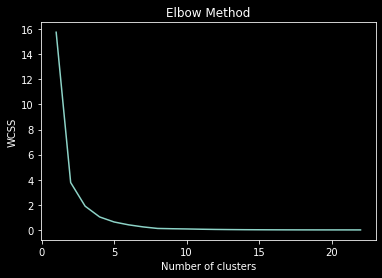

In [13]:
wcss = []
for i in range(1, 23):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 23), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Ativos com Melhor Relação em Cada Cluster: ['B3SA3.SA', 'PRIO3.SA', 'MGLU3.SA', 'JBSS3.SA']


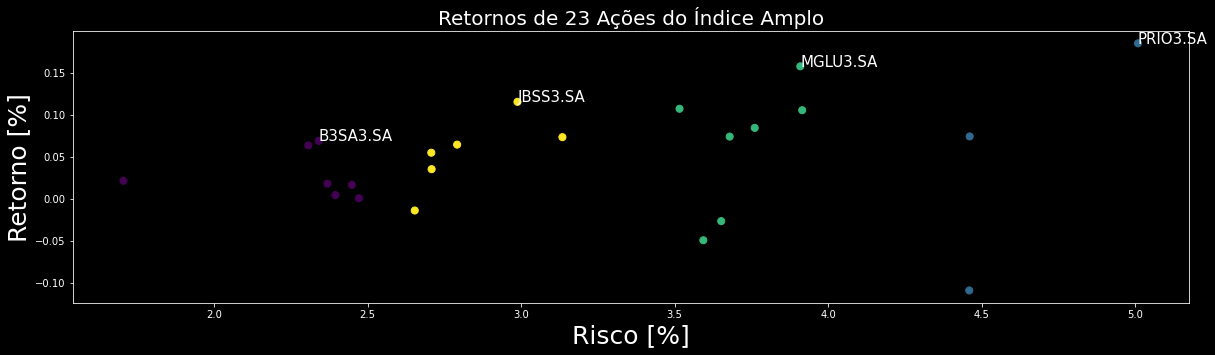

In [14]:
retornos=output[list(set(stocks)-set(['TCSA3','HBOR3']))].pct_change()
stocks=retornos.columns


X=100*np.array([[np.std(retornos[sto]),np.mean(retornos[sto])] for sto in stocks])

N=4

kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.set_title('Retornos de '+str(len(stocks))+' Ações do Índice Amplo',fontsize=20)
ax1.set_xlabel('Risco [%]',fontsize=25)
ax1.set_ylabel('Retorno [%]',fontsize=25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2);

best=[]
for i in range(N):
    ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()/retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
    best.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(best).columns)
print("Ativos com Melhor Relação em Cada Cluster:", rb)

for r in rb:
    plt.text(X[stocks==r][0][0],X[stocks==r][0][1],r,fontsize=15)

Após a análise, estes foram os 3 ativos selecionados:

In [18]:
ativos=[0,8,21, 3]

in_sample=tr_aux[tr_aux.columns[ativos]] 
in_sample

,MGLU3.SA,PRIO3.SA,JBSS3.SA,B3SA3.SA
2018-01-02,2.478125,1.7090,10.100000,7.636666
2018-01-03,2.446875,1.7400,9.880000,7.766666
2018-01-04,2.505625,1.8002,9.900000,7.816666
2018-01-05,2.456250,1.9016,9.980000,7.930000
2018-01-08,2.456562,2.0456,10.000000,7.966666
...,...,...,...,...
2020-12-22,25.160000,11.9360,24.059999,20.093332
2020-12-23,24.969999,13.2260,23.780001,19.996666
2020-12-28,25.250000,13.3080,23.850000,20.500000
2020-12-29,25.280001,13.5640,24.010000,20.606667


In [19]:
out_sample=te_aux[tr_aux.columns[ativos]] 
out_sample

,MGLU3.SA,PRIO3.SA,JBSS3.SA,B3SA3.SA
2021-01-04,25.200001,14.960000,23.410000,20.326666
2021-01-05,24.760000,14.758000,23.750000,20.366667
2021-01-06,23.459999,14.590000,23.540001,20.033333
2021-01-07,23.160000,14.806000,23.830000,20.593332
2021-01-08,23.840000,14.890000,24.400000,20.896666
...,...,...,...,...
2021-12-23,6.200000,19.700001,37.720001,11.380000
2021-12-27,6.780000,20.660000,37.470001,11.310000
2021-12-28,6.830000,20.049999,37.889999,11.160000
2021-12-29,6.760000,20.049999,38.049999,11.080000


## Teoria do Portifolio Moderno (Markovitz)

Com o objetivo de definirmos o peso de cada ativo selecionado, aplicamos o Teorema de Markovitz para um portifólio com 3 ativos e obtivemos os seguintes resultados:


Preços [R$]:
            Open  High   Low  Close
Date                               
2021-02-22  8.92  9.30  8.67   9.29
2021-02-23  9.50  9.60  9.10   9.12
2021-02-24  9.16  9.28  9.07   9.15
2021-02-25  9.18  9.29  9.00   9.05
2021-02-26  9.15  9.17  8.90   8.93

Retornos [%]:
                  r1        r2        r3        r4
2018-01-03 -1.261034  1.813927 -2.178220  1.702315
2018-01-04  2.370740  3.522526  0.198015  0.654738
2018-01-05 -1.992436  5.933295  0.792078  1.484073
2018-01-08  0.012594  8.425976  0.198024  0.480136

Matriz de Volatilidade [%]:
           r1         r2        r3        r4
r1  14.893463   0.000000  0.000000  0.000000
r2   0.000000  14.420019  0.000000  0.000000
r3   0.000000   0.000000  5.944505  0.000000
r4   0.000000   0.000000  0.000000  4.773843



Text(0.5, 1.0, 'Correlações entre ativos ')

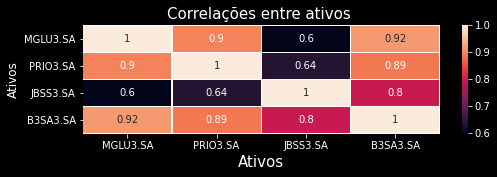

In [20]:
ret=in_sample.diff().dropna().copy()
ret=100*ret/in_sample.iloc[0]

ret.columns=list(['r'+str(x) for x in range(1,5)])

C=ret.cov()

sig=ret.std()

MU=ret.sum()

I=pd.DataFrame(np.identity(len(C)))

SIGMA=(C*(I.values))**0.5

P=in_sample.corr()
print()
print("Preços [R$]:")
print(df.head())
print('')
print("Retornos [%]:")
print(ret.head(4))
print('')
print("Matriz de Volatilidade [%]:")
print(SIGMA)
print()
f, ax = plt.subplots(figsize=(8, 2))
sns.heatmap(P, annot=True, linewidths=.5, ax=ax)
plt.yticks(rotation=0) 
ax.set_ylabel("Ativos",fontsize=12)  
ax.set_xlabel("Ativos",fontsize=15)  
ax.set_title("Correlações entre ativos ",fontsize=15) 

In [21]:
q=np.array([0.4, 0.6])
print()
print('Os pesos dos ativos r1 e r2 são %.2f e %.2f, respectivamente ' % (q[0],q[1]))
print()

r=ret[['r1','r2']]

C=r.cov()
MU=r.mean()

retp=np.dot(pd.DataFrame(q).transpose(),MU)

risp=np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),np.array(q)))

print('O retorno e risco de rp em : %.2f e %.2f' % (retp,risp))
print()


Os pesos dos ativos r1 e r2 são 0.40 e 0.60, respectivamente 

O retorno e risco de rp em : 1.07 e 11.91



In [22]:
np.sum(q)

1.0

In [25]:
N=len(ret.columns)
q = [random.randint(0,1000) for i in range(1,N+1)]
s = sum(q)
q = [ i/s for i in q ]
print(np.sum(q))

rp=np.dot(ret,q)
C=ret.cov()
MU=ret.mean()
retp=np.dot(pd.DataFrame(q).transpose(),MU)
risp=np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))


print()
print('Os pesos dos ativos são:',[round(q[i],2) for i in range(len(q))])
print()
print('O retorno e risco de rp em : %.2f e %.2f' % (retp[0], risp[0][0]))
print()

1.0

Os pesos dos ativos são: [0.32, 0.17, 0.15, 0.36]

O retorno e risco de rp em : 0.67 e 7.65



In [26]:
pesos=[0.32, 0.17, 0.15, 0.36] 
np.sum(pesos)

1.0

## Amostra de Treino

Com estes resultados, aplicamos um capital de 100.000 reais em nossa amostra de treino

In [27]:
capital=100000

st_in_1=round(pesos[0]*capital/in_sample[in_sample.columns[0]].iloc[0])
st_in_2=round(pesos[1]*capital/in_sample[in_sample.columns[1]].iloc[0])
st_in_3=round(pesos[2]*capital/in_sample[in_sample.columns[2]].iloc[0])
st_in_4=round(pesos[3]*capital/in_sample[in_sample.columns[3]].iloc[0])
st_in=[st_in_1,st_in_2,st_in_3, st_in_4]
st_in

[12913, 9947, 1485, 4714]

In [31]:
# Capital Primeiro Dia in sample
np.sum([in_sample[in_sample.columns[i]].iloc[0]*st for i,st in zip(range(4),st_in)])

99997.19551813602

In [32]:
# Capital Ultimo dia in Sample
np.sum([in_sample[in_sample.columns[i]].iloc[-1]*st for i,st in zip(range(4),st_in)])

594341.685968399

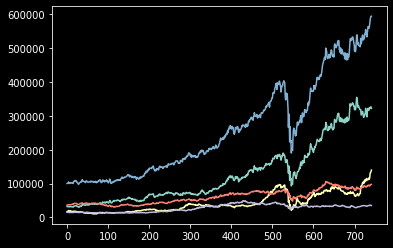

In [33]:
port=[]
for i,st in zip(range(4),st_in): 
    res=in_sample[in_sample.columns[i]].values*st
    port.append(res)
    plt.plot(res)
plt.plot(pd.DataFrame(port).transpose().sum(axis=1).values)


In [39]:
in_sample

,MGLU3.SA,PRIO3.SA,JBSS3.SA,B3SA3.SA
2018-01-02,2.478125,1.7090,10.100000,7.636666
2018-01-03,2.446875,1.7400,9.880000,7.766666
2018-01-04,2.505625,1.8002,9.900000,7.816666
2018-01-05,2.456250,1.9016,9.980000,7.930000
2018-01-08,2.456562,2.0456,10.000000,7.966666
...,...,...,...,...
2020-12-22,25.160000,11.9360,24.059999,20.093332
2020-12-23,24.969999,13.2260,23.780001,19.996666
2020-12-28,25.250000,13.3080,23.850000,20.500000
2020-12-29,25.280001,13.5640,24.010000,20.606667


## Amostra de teste

Partindo dos bons resultados gerados na amostra de treino, fizemos a aplicação na amostra de teste e obtivemos os seguintes resultados

In [34]:
st_out_1=round(pesos[0]*capital/out_sample[out_sample.columns[0]].iloc[0])
st_out_2=round(pesos[1]*capital/out_sample[out_sample.columns[1]].iloc[0])
st_out_3=round(pesos[2]*capital/out_sample[out_sample.columns[2]].iloc[0])
st_out_4=round(pesos[3]*capital/out_sample[out_sample.columns[3]].iloc[0])
st_out=[st_out_1,st_out_2,st_out_3,st_out_4]
st_out

[1270, 1136, 641, 1771]

In [35]:
# Capital Primeiro Dia out of sample
np.sum([out_sample[out_sample.columns[i]].iloc[0]*st for i,st in zip(range(4),st_out)])

100002.89618492126

In [36]:
# Ultimo Primeiro Dia out of sample
np.sum([out_sample[out_sample.columns[i]].iloc[-1]*st for i,st in zip(range(4),st_out)])

76705.4109172821

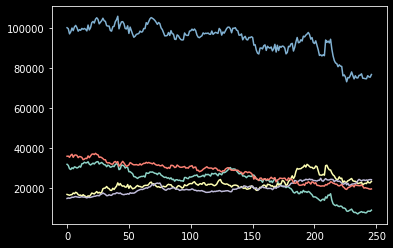

In [37]:
port=[]
for i,st in zip(range(4),st_out): 
    res=out_sample[out_sample.columns[i]].values*st
    port.append(res)
    plt.plot(res)
plt.plot(pd.DataFrame(port).transpose().sum(axis=1).values)

In [38]:
out_sample

,MGLU3.SA,PRIO3.SA,JBSS3.SA,B3SA3.SA
2021-01-04,25.200001,14.960000,23.410000,20.326666
2021-01-05,24.760000,14.758000,23.750000,20.366667
2021-01-06,23.459999,14.590000,23.540001,20.033333
2021-01-07,23.160000,14.806000,23.830000,20.593332
2021-01-08,23.840000,14.890000,24.400000,20.896666
...,...,...,...,...
2021-12-23,6.200000,19.700001,37.720001,11.380000
2021-12-27,6.780000,20.660000,37.470001,11.310000
2021-12-28,6.830000,20.049999,37.889999,11.160000
2021-12-29,6.760000,20.049999,38.049999,11.080000


## Conclusão

A partir do resultados gerados, podemos concluir que apesar dos elevados ganhos nas amostras de treino, no período de teste passamos por um período de grandes baixas, principalmente dos ativos MGLU3 e B3SA3, assim gerando uma perda de aproximadamente 14% do capital inicial. Desta forma, podemos concluir que devido a alta volatilidade e imprevisibilidade do mercado, as amostras de treinamento não ditaram o comportamento do período real de teste, que passou por crises não previstas pela amostra de treino.